# Data preparation

We generate XOR data points with Gaussian noise.

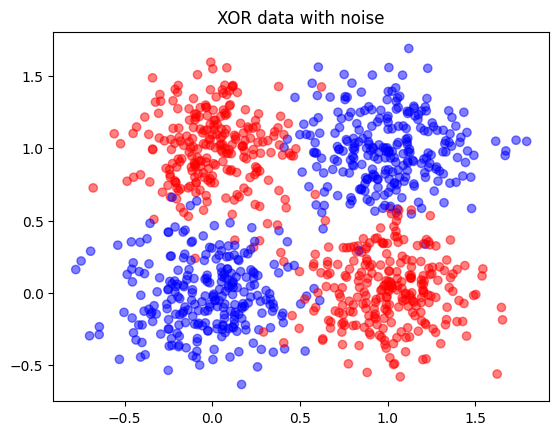

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# XOR seeds
x_seeds = np.array([[0,0],[1,0],[0,1],[1,1]], dtype=float)
y_seeds = np.array([0,1,1,0], dtype=float)

# Sample data
N = 1000
idxs = np.random.randint(0, 4, N)
X = x_seeds[idxs]
y = y_seeds[idxs]

# Add Gaussian noise
X += np.random.normal(scale=0.25, size=X.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', alpha=0.5)
plt.title("XOR data with noise")
plt.show()

# Model

We implement a shallow neural network with one hidden layer.

In [11]:
class ShallowNN:
    def __init__(self, num_input_features, num_hiddens):
        self.num_input_features = num_input_features
        self.num_hiddens = num_hiddens
        self.W1 = np.random.normal(scale=1.0, size=(num_hiddens, num_input_features))
        self.b1 = np.random.normal(size=(num_hiddens,))
        self.W2 = np.random.normal(size=(num_hiddens,))
        self.b2 = float(np.random.normal())
    def sigmoid(self, z):
        return 1.0/(1.0 + np.exp(-z))
    def predict(self, X):
        z1 = X.dot(self.W1.T) + self.b1
        a1 = np.tanh(z1)
        z2 = a1.dot(self.W2) + self.b2
        a2 = self.sigmoid(z2)
        return a2, (z1, a1, z2)

model = ShallowNN(num_input_features=2, num_hiddens=3)

# Train (with element-wise operations → vectorized)

We train the model using backpropagation.  
Gradients are initialized with zeros each epoch (`dW1, db1, dW2, db2`).  
Training is vectorized (no for-loops over neurons).

epoch   0 cost 0.840401
epoch 500 cost 0.628725
epoch 1000 cost 0.337793
epoch 1500 cost 0.197898
epoch 2000 cost 0.165680
epoch 2500 cost 0.152404
epoch 3000 cost 0.145253
epoch 3500 cost 0.140825
epoch 4000 cost 0.137817
epoch 4500 cost 0.135624


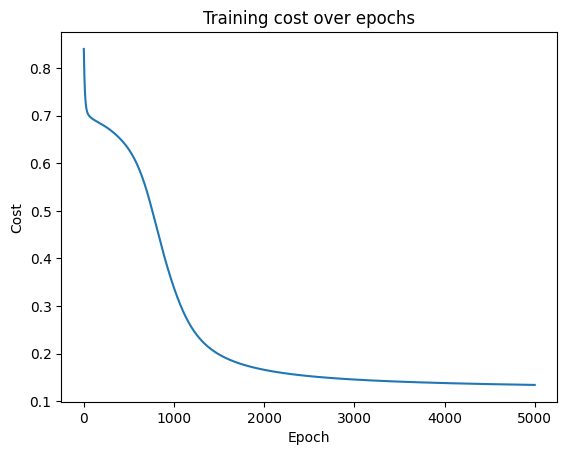

In [12]:
def train(X, y, model, lr, epochs):
    n = X.shape[0]
    costs = []
    for epoch in range(epochs):
        # Forward
        a2, (z1, a1, z2) = model.predict(X)
        eps = 1e-8
        cost = -np.mean(y * np.log(a2 + eps) + (1 - y) * np.log(1 - a2 + eps))
        
        # Gradients
        dz2 = a2 - y
        dW2 = a1.T.dot(dz2) / n
        db2 = dz2.mean()
        delta1 = (dz2[:, None] * model.W2[None, :]) * (1 - a1**2)
        dW1 = delta1.T.dot(X) / n
        db1 = delta1.mean(axis=0)
        
        # Update
        model.W1 -= lr * dW1
        model.b1 -= lr * db1
        model.W2 -= lr * dW2
        model.b2 -= lr * db2
        
        costs.append(cost)
        if epoch % 500 == 0:
            print(f"epoch {epoch:3d} cost {cost:.6f}")
    return costs

costs = train(X, y, model, lr=0.1, epochs=5000)

plt.plot(costs)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Training cost over epochs")
plt.show()

# Test

We evaluate the model on the four canonical XOR inputs.

In [13]:
for t in x_seeds:
    prob, _ = model.predict(t.reshape(1,-1))
    print(f" input {t.tolist()} -> prob {float(prob[0]):.6f}")

 input [0.0, 0.0] -> prob 0.044213
 input [1.0, 0.0] -> prob 0.995968
 input [0.0, 1.0] -> prob 0.994686
 input [1.0, 1.0] -> prob 0.002140
